Epoch 1/10


C:\Users\hameh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8188 - mse: 2.1485 - val_loss: 1.0083 - val_mse: 0.6381
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8335 - mse: 0.5301 - val_loss: 0.8156 - val_mse: 0.5191
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7002 - mse: 0.4543 - val_loss: 0.7151 - val_mse: 0.4589
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6728 - mse: 0.4316 - val_loss: 0.8810 - val_mse: 0.5754
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6474 - mse: 0.4252 - val_loss: 0.6806 - val_mse: 0.4250
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6070 - mse: 0.3856 - val_loss: 0.6533 - val_mse: 0.4107
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5983 - mse: 0.3801 - val_loss: 0.6554 - val_mse: 0.4141
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6050 - mse: 0.3871 - val_loss: 0.7273 - val_mse: 0.4370
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6035 

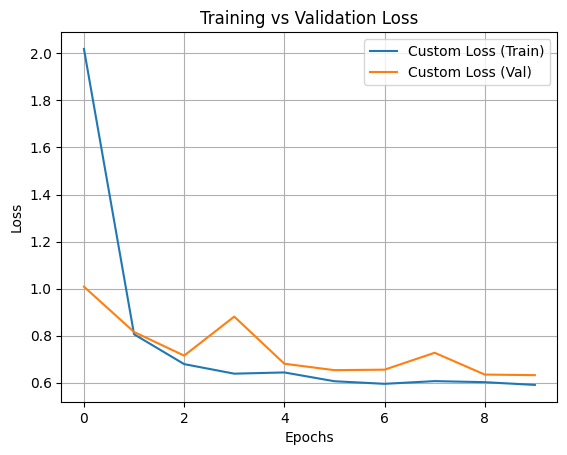

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Load the California Housing Dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Define custom weighted MSE loss
def custom_weighted_mse(y_true, y_pred):
    weights = tf.where(y_true > 2.0, 2.0, 1.0)  # Weight higher-priced houses more
    squared_error = tf.square(y_true - y_pred)
    weighted_mse = tf.reduce_mean(squared_error * weights)
    return weighted_mse

# 5. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(1)  # Regression output
])

# 6. Compile with custom loss and adam optimizer
model.compile(optimizer='adam', loss=custom_weighted_mse, metrics=['mse'])

# 7. Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# 8. Evaluate on test data using standard MSE
y_pred = model.predict(X_test).flatten()
standard_mse = mean_squared_error(y_test, y_pred)

# 9. Compute custom loss on test data manually
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)
y_pred_tensor = tf.convert_to_tensor(y_pred, dtype=tf.float32)
custom_loss_value = custom_weighted_mse(y_test_tensor, y_pred_tensor).numpy()

# 10. Print comparison table
print("\nLoss Comparison Table:")
print("------------------------")
print(f"Standard MSE       : {standard_mse:.4f}")
print(f"Custom Loss (WMSE) : {custom_loss_value:.4f}")

# 11. Plot training & validation loss
plt.plot(history.history['loss'], label='Custom Loss (Train)')
plt.plot(history.history['val_loss'], label='Custom Loss (Val)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()
